<a href="https://colab.research.google.com/github/georgeragan/MINSTS/blob/main/MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING DEPEMDENCIES

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg
from PIL import Image#image processing
import tensorflow as tf #deep learning library
tf.random.set_seed(3)## when training a neural network and when neural network start to learn from data,there are some parameters that
#has to be given to neural network and in some cases values will be generated randomly and becuase of this randomnes,each time youb train
#your neural network you will get dif results even if you use same dat,so accuracy will change slightly.inorder to avoid we set random set=3
from tensorflow import keras#wrapper of deep learning library.helps to easily create neural network
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

LOADING DATASETS

In [70]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [71]:
type(X_train)

numpy.ndarray

**NO RESIZING NO PROCESSING BECAUSE ALREADY IMAGES ARE RESIZED**

In [72]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)#xtrain contains 60000image with dimension (28*28)ie grey scale.xtest contains 10000image

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [73]:
#printing 10th image
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254,
        254, 254, 254, 254, 238,  70,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 104, 244,
        254, 224, 254, 254, 254, 141,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        254, 210, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84,
        206, 254, 254, 254, 254,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 209, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91,
        137, 253, 254, 254, 254, 112,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 214, 250,
        254, 254, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 247, 254,
        254, 254, 254, 254, 254, 146,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 246,
        254, 254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73,
         89,  89,  93, 240, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1, 128, 254, 219,  31,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 254, 254, 214,  28,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 138, 254, 254, 116,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  19, 177,  90,   0,   0,   0,   0,
          0,  25, 240, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 254, 215,  63,  36,   0,  51,
         89, 206, 254, 254, 139,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  57, 197, 254, 254, 222, 180, 241,
        254, 254, 253, 213,  11,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 140, 105, 254, 254, 254, 254,
        254, 254, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 117, 117, 165, 254,
        254, 239,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

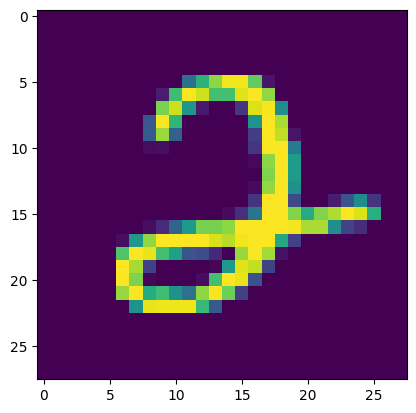

2


In [103]:
image=plt.imshow(X_train[16])
plt.show()
print(Y_train[16])

In [75]:
#image labels whether unique or not
print(np.unique(Y_train))
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


SCALLING THE IMAGE

In [76]:
X_train=X_train/255
X_test=X_test/255

In [77]:
X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

BUILDING NEURAL NETWORK

In [78]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])# labelsb we have from 0 to 9 so 10 values.10 means number of neurons in outer layer is 10

COMPILING THE NEURAL NETWORK

In [79]:
model.compile(optimizer="adam", #determine the most best parameter for accurate results
              loss="sparse_categorical_crossentropy", #TARGET IS 0,1,2 ETC USE THIS loss
              metrics=["accuracy"])#number of correct prediction/total number of prediction

MODEL TRAINING AND ACCURACY ON TRAINING DATA

In [80]:
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=10)
#loss=truevalue-predicted value
#EPOCH-HOW MAY TIMES SHOULD NEURAL NETWORK GO THROUGH THE DATA.EACH TIME IT CHANGES ITS PARAMETERS AND IT GIVES ACCURACY

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3220 - accuracy: 0.9054 - val_loss: 0.1477 - val_accuracy: 0.9553
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1504 - accuracy: 0.9555 - val_loss: 0.1195 - val_accuracy: 0.9628
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1126 - accuracy: 0.9652 - val_loss: 0.1009 - val_accuracy: 0.9713
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0894 - accuracy: 0.9727 - val_loss: 0.1051 - val_accuracy: 0.9710
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9768 - val_loss: 0.0888 - val_accuracy: 0.9765
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0641 - accuracy: 0.9801 - val_loss: 0.0999 - val_accuracy: 0.9717
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.0966 - val_accuracy:

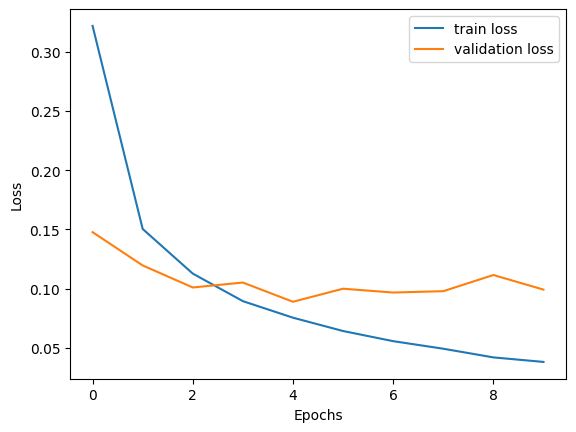

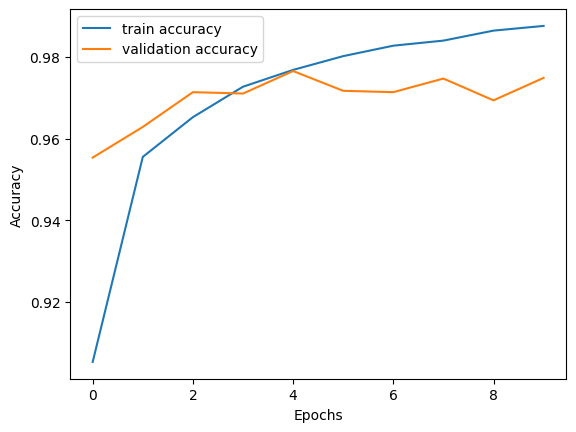

In [81]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

ACCURACY ON TEST DATA

In [82]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9704
Test Accuracy = 0.9703999757766724


In [83]:
print(X_test.shape)

(10000, 28, 28)


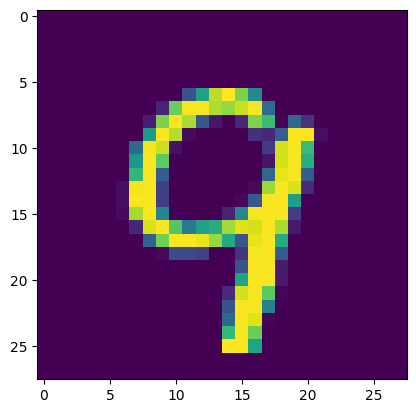

In [98]:
plt.imshow(X_test[16])
plt.show()

In [95]:
print(Y_test[8])

5


In [88]:
y_pred=model.predict(X_test)
print(y_pred.shape)

313/313 [==============================] - 0s 1ms/step
(10000, 10)


In [89]:
y_pred[0]#the probabilty from 0 to 9

array([1.1046919e-03, 1.2726233e-03, 8.9900458e-01, 9.7612554e-01,
       1.5853484e-06, 1.9970807e-01, 5.5295349e-08, 9.9999982e-01,
       8.3763564e-01, 4.6445289e-01], dtype=float32)

  CONVERTING INTO LABELS

In [90]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [91]:
print(Y_test)

[7 2 1 ... 4 5 6]


Y_TEST IS TRUE LABELS AND Y_PRED_LABELS VALUES PREDICTED BY NEURAL

In [92]:
y_pred_labels[0]

7